<a href="https://colab.research.google.com/github/Marcin19721205/MachineLearingBootCampPartII/blob/main/04_hierarchical_clustering01MJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### scikit-learn
Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  

Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```
Kurs stworzony w oparciu o wersję `0.22.1`

### Spis treści:
1. [Import bibliotek](#0)
2. [Wygenerowanie danych](#1)
3. [Wizualizacja danych](#2)
4. [Wizualizacja - dendrogram](#3)
5. [Grupowanie hierarchiczne](#4)
6. [Wizualizacja klastrów](#5)
7. [Porównanie metryk (euklidesowa, Manhattan, kosinusowa)](#6)


### <a name='0'></a> Import bibliotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(font_scale=1.2)

### <a name='1'></a> Wygenerowanie danych

In [2]:
from sklearn.datasets import make_blobs

data = make_blobs(n_samples=10, centers=2, cluster_std=1.0, center_box=(-8.0, 8.0), random_state=42)[0]
df = pd.DataFrame(data, columns=['x1', 'x2'])
df.head()

,x1,x2
0,1.986985,1.016248
1,-2.470776,6.745699
2,-0.428145,7.978864
3,2.699072,1.892783
4,-2.241511,6.977292


### <a name='2'></a> Wizualizacja danych

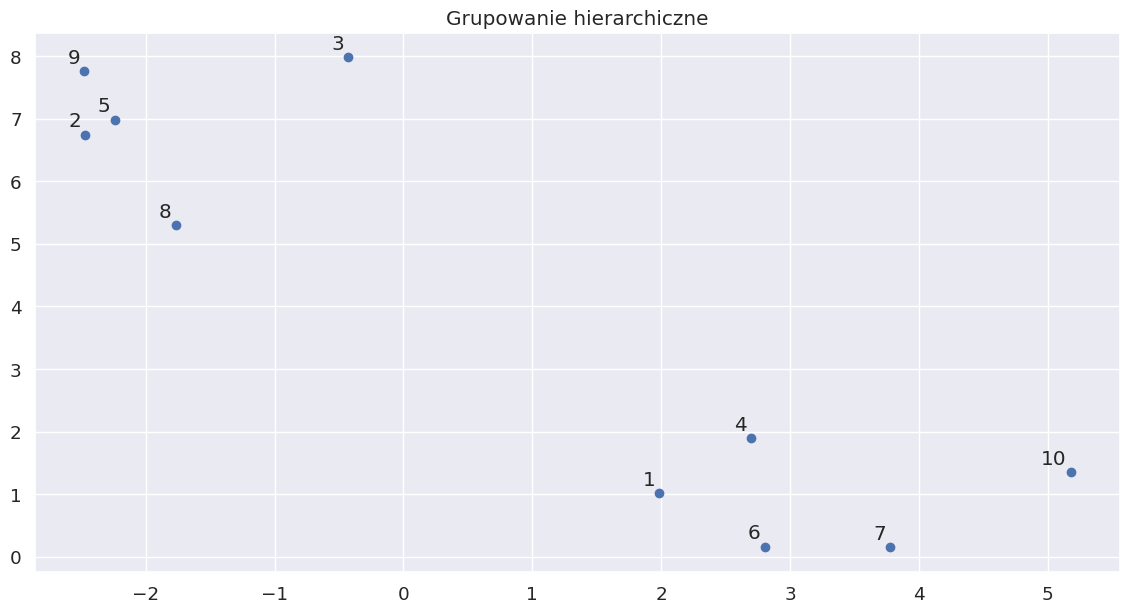

In [3]:
plt.figure(figsize=(14, 7))
plt.scatter(data[:,0], data[:,1])

for label, x, y in zip(range(1, 11), data[:, 0], data[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-3, 3), textcoords='offset points', ha='right', va='bottom')
plt.title('Grupowanie hierarchiczne')
plt.show()

### <a name='3'></a> Wizualizacja - dendrogram

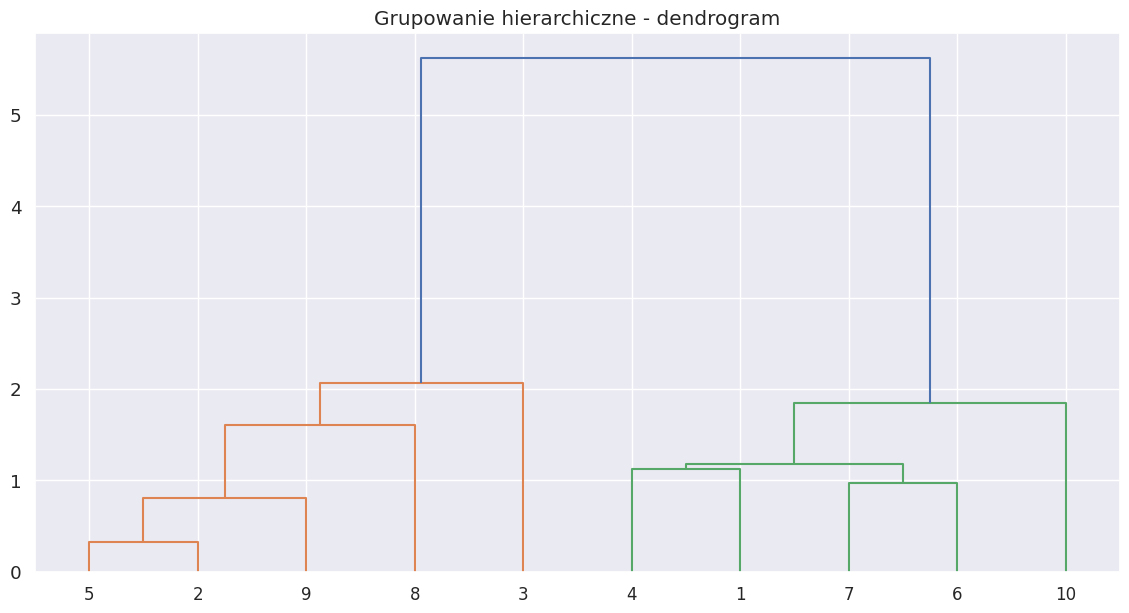

In [4]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

# przeprowadzenie grupowania hierarchicznego
linked = linkage(data)

# wizualizacja grupowania hierarchicznego jako dendrogram
plt.figure(figsize=(14, 7))
dendrogram(linked, orientation='top', labels=range(1, 11), distance_sort='descending', show_leaf_counts=True)
plt.title('Grupowanie hierarchiczne - dendrogram')
plt.show()

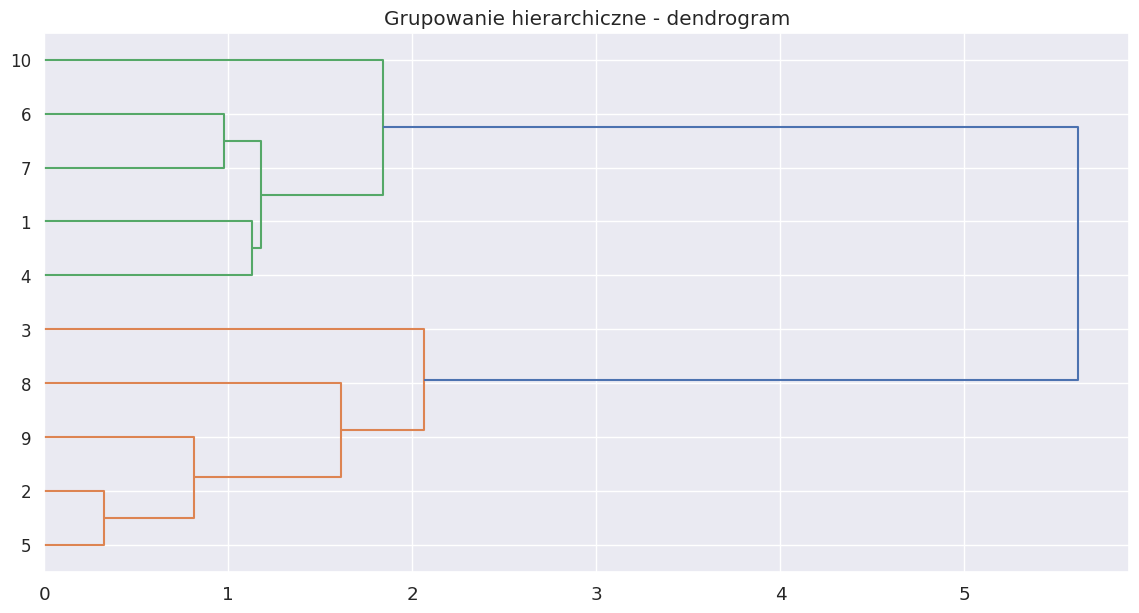

In [5]:
plt.figure(figsize=(14, 7))
dendrogram(linked, orientation='right', labels=range(1, 11), distance_sort='descending', show_leaf_counts=True)
plt.title('Grupowanie hierarchiczne - dendrogram')
plt.show()

### <a name='4'></a> Grupowanie hierarchiczne

In [6]:
# bottom-up approach
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2)
cluster.fit_predict(data)

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0])

### <a name='5'></a> Wizualizacja klastrów

In [7]:
df = pd.DataFrame(data, columns=['x1', 'x2'])
df['cluster'] = cluster.labels_

fig = px.scatter(df, 'x1', 'x2', 'cluster', width=950, height=500, template='plotly_dark',
                 title='Grupowanie hierarchiczne', color_continuous_midpoint=0.6)
fig.update_traces(marker_size=12)
fig.show()

### <a name='6'></a> Porównanie metryk (euklidesowa, Manhattan, kosinusowa)

In [9]:
data = make_blobs(n_samples=1000, centers=4, cluster_std=1.5, center_box=(-8.0, 8.0), random_state=42)[0]
df = pd.DataFrame(data, columns=['x1', 'x2'])

px.scatter(df, 'x1', 'x2', width=950, height=500, title='Grupowanie hierarchiczne', template='plotly_dark')

Odległość euklidesowa

In [10]:
cluster_euclidean = AgglomerativeClustering(n_clusters=4)
cluster_euclidean.fit_predict(data)

array([3, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 3,
       3, 3, 2, 2, 0, 0, 1, 2, 1, 1, 1, 0, 0, 3, 1, 2, 3, 3, 2, 1, 2, 3,
       2, 0, 0, 2, 3, 2, 1, 0, 2, 3, 0, 3, 0, 0, 0, 1, 1, 0, 1, 3, 2, 0,
       1, 1, 2, 0, 3, 0, 2, 1, 2, 3, 2, 0, 2, 0, 1, 0, 0, 0, 2, 3, 1, 1,
       0, 0, 0, 0, 2, 2, 3, 2, 3, 0, 2, 1, 2, 3, 3, 3, 0, 2, 2, 0, 1, 0,
       0, 1, 2, 2, 2, 2, 1, 3, 1, 2, 0, 1, 3, 2, 3, 1, 2, 3, 1, 2, 0, 1,
       2, 3, 2, 0, 0, 1, 2, 2, 0, 0, 3, 3, 3, 2, 2, 0, 0, 0, 0, 3, 1, 1,
       0, 2, 0, 2, 2, 3, 1, 0, 2, 1, 0, 0, 2, 1, 3, 1, 2, 0, 0, 2, 0, 3,
       1, 3, 1, 3, 2, 2, 0, 1, 0, 1, 2, 3, 0, 1, 2, 0, 2, 2, 0, 0, 1, 1,
       1, 3, 0, 1, 2, 0, 2, 2, 1, 0, 2, 1, 1, 3, 1, 1, 2, 0, 1, 0, 3, 2,
       3, 3, 1, 0, 3, 0, 2, 1, 1, 0, 0, 1, 0, 3, 1, 1, 3, 1, 1, 2, 1, 3,
       1, 2, 3, 0, 2, 0, 2, 2, 2, 2, 3, 2, 2, 1, 0, 1, 1, 2, 2, 2, 3, 2,
       3, 0, 1, 2, 0, 3, 2, 0, 2, 1, 0, 0, 2, 3, 1, 2, 3, 1, 3, 2, 1, 0,
       0, 1, 0, 3, 3, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,

In [11]:
df_euclidean = pd.DataFrame(data, columns=['x1', 'x2'])
df_euclidean['cluster'] = cluster_euclidean.labels_
fig = px.scatter(df_euclidean, 'x1', 'x2', 'cluster', width=950, height=500, template='plotly_dark',
                 title='Grupowanie hierarchiczne - metryka euklidesowa', color_continuous_midpoint=0.6)
fig.show()

Metryka Manhattan

In [13]:
cluster_manhattan = AgglomerativeClustering(n_clusters=4, metric='manhattan', linkage='complete')
cluster_manhattan.fit_predict(data)

array([0, 3, 3, 2, 2, 3, 2, 3, 3, 2, 2, 0, 0, 3, 3, 3, 0, 0, 0, 2, 2, 0,
       1, 1, 2, 2, 0, 0, 3, 2, 3, 3, 3, 0, 0, 1, 3, 2, 1, 1, 2, 3, 2, 1,
       2, 0, 0, 2, 1, 2, 3, 0, 2, 1, 0, 1, 0, 0, 0, 3, 3, 0, 3, 0, 2, 0,
       3, 3, 2, 0, 0, 0, 2, 3, 2, 1, 2, 0, 2, 0, 3, 0, 0, 0, 2, 0, 3, 3,
       0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 2, 3, 2, 1, 1, 1, 1, 2, 2, 0, 3, 0,
       1, 3, 2, 2, 2, 2, 3, 1, 3, 2, 0, 3, 1, 2, 1, 3, 2, 1, 3, 2, 0, 3,
       2, 1, 2, 0, 0, 3, 2, 2, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 1, 3, 3,
       1, 2, 0, 2, 2, 1, 3, 0, 2, 3, 0, 0, 2, 3, 0, 3, 2, 0, 1, 2, 0, 0,
       3, 1, 3, 1, 2, 2, 0, 3, 0, 3, 2, 1, 0, 3, 2, 0, 2, 2, 0, 0, 3, 3,
       3, 1, 0, 3, 2, 0, 2, 2, 3, 0, 2, 3, 3, 0, 3, 3, 2, 0, 3, 0, 1, 2,
       0, 1, 3, 0, 1, 0, 2, 3, 3, 0, 0, 3, 0, 1, 3, 3, 1, 3, 3, 2, 3, 1,
       3, 2, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 3, 0, 3, 3, 2, 2, 2, 1, 2,
       1, 0, 3, 2, 0, 1, 2, 0, 2, 3, 0, 0, 2, 1, 3, 2, 0, 3, 1, 2, 3, 0,
       0, 3, 0, 1, 1, 1, 3, 3, 3, 0, 3, 3, 3, 0, 3,

In [14]:
df_manhattan = pd.DataFrame(data, columns=['x1', 'x2'])
df_manhattan['cluster'] = cluster_manhattan.labels_
fig = px.scatter(df_manhattan, 'x1', 'x2', 'cluster', width=950, height=500, template='plotly_dark',
                 title='Grupowanie hierarchiczne - metryka Manhattan', color_continuous_midpoint=0.6)
fig.show()

Odległość kosinusowa

In [16]:
cluster_cosine = AgglomerativeClustering(n_clusters=4, metric='cosine', linkage='complete')
cluster_cosine.fit_predict(data)

array([2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 1, 1, 1, 2, 2, 3, 0, 0, 2,
       2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 0, 1, 0, 2,
       0, 2, 2, 0, 2, 0, 1, 3, 0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0, 3,
       1, 1, 0, 2, 2, 2, 0, 1, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 0, 2, 1, 1,
       2, 2, 2, 3, 0, 0, 2, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 3, 0, 2, 1, 2,
       2, 1, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2, 1, 0, 2, 1, 0, 2, 1,
       0, 2, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 1,
       2, 0, 2, 0, 0, 2, 1, 2, 3, 1, 3, 2, 0, 1, 2, 1, 0, 3, 2, 0, 2, 2,
       1, 2, 1, 2, 0, 0, 2, 1, 2, 1, 0, 2, 2, 1, 0, 2, 0, 3, 2, 2, 1, 1,
       1, 2, 2, 1, 0, 2, 0, 0, 1, 2, 0, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2, 0,
       2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 0, 1, 2,
       1, 0, 2, 3, 3, 2, 0, 0, 3, 0, 2, 0, 0, 1, 2, 1, 1, 0, 0, 3, 2, 0,
       2, 2, 1, 0, 3, 2, 0, 3, 0, 1, 2, 2, 0, 2, 1, 0, 2, 1, 2, 0, 1, 3,
       2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1,

In [17]:
df_cosine = pd.DataFrame(data, columns=['x1', 'x2'])
df_cosine['cluster'] = cluster_cosine.labels_
fig = px.scatter(df_cosine, 'x1', 'x2', 'cluster', width=950, height=500, template='plotly_dark',
                 title='Grupowanie hierarchiczne - metryka kosinusowa', color_continuous_midpoint=0.6)
fig.show()

In [18]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=3, column_titles=['euclidean', 'Manhattan', 'cosine'])

fig1 = px.scatter(df_euclidean, 'x1', 'x2', 'cluster')['data'][0]
fig2 = px.scatter(df_manhattan, 'x1', 'x2', 'cluster')['data'][0]
fig3 = px.scatter(df_cosine, 'x1', 'x2', 'cluster')['data'][0]

fig.add_trace(fig1, row=1, col=1)
fig.add_trace(fig2, row=1, col=2)
fig.add_trace(fig3, row=1, col=3)
fig.update_layout(template='plotly_dark')
fig.show()

#Softsensor

In [19]:
from sklearn.datasets import make_blobs

df_soft = pd.read_csv("/content/sample_data/SoftSensor.csv")
df = pd.DataFrame(data, columns=['x1', 'x2'])
df.head()

,x1,x2
0,-6.645730,5.470461
1,-4.390559,-5.055149
2,-4.666211,-5.390080
3,3.022862,0.303769
4,3.322516,-0.676179


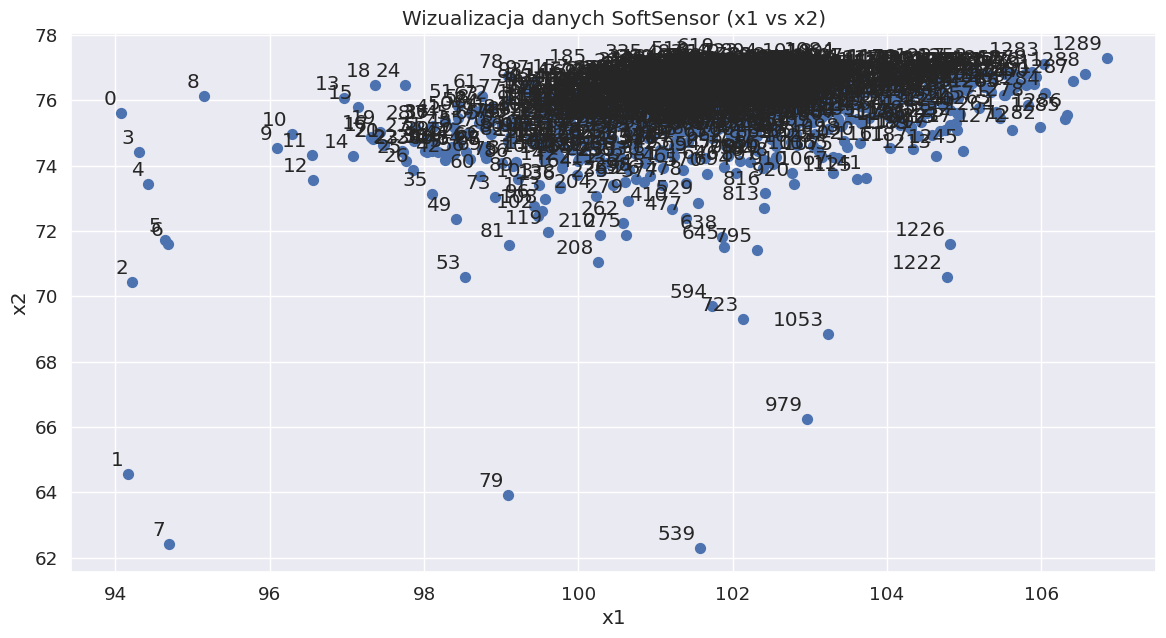

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Wczytanie danych z prawidłowym separatorem
df_soft = pd.read_csv("/content/sample_data/SoftSensor.csv", delimiter=';')
df = df_soft.rename(columns={'Zasadowosc': 'x1', 'Wyd_sodowa': 'x2'})

# Podgląd
df.head()

# --- Rysowanie poprawione ---
plt.figure(figsize=(14,7))
plt.scatter(df['x1'], df['x2'], s=50)

# Dodanie etykiet punktów
for idx, (x, y) in enumerate(zip(df['x1'], df['x2'])):
    plt.annotate(
        str(idx),          # numer punktu
        xy=(x, y),
        xytext=(-3, 3),
        textcoords='offset points',
        ha='right',
        va='bottom'
    )

plt.title("Wizualizacja danych SoftSensor (x1 vs x2)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

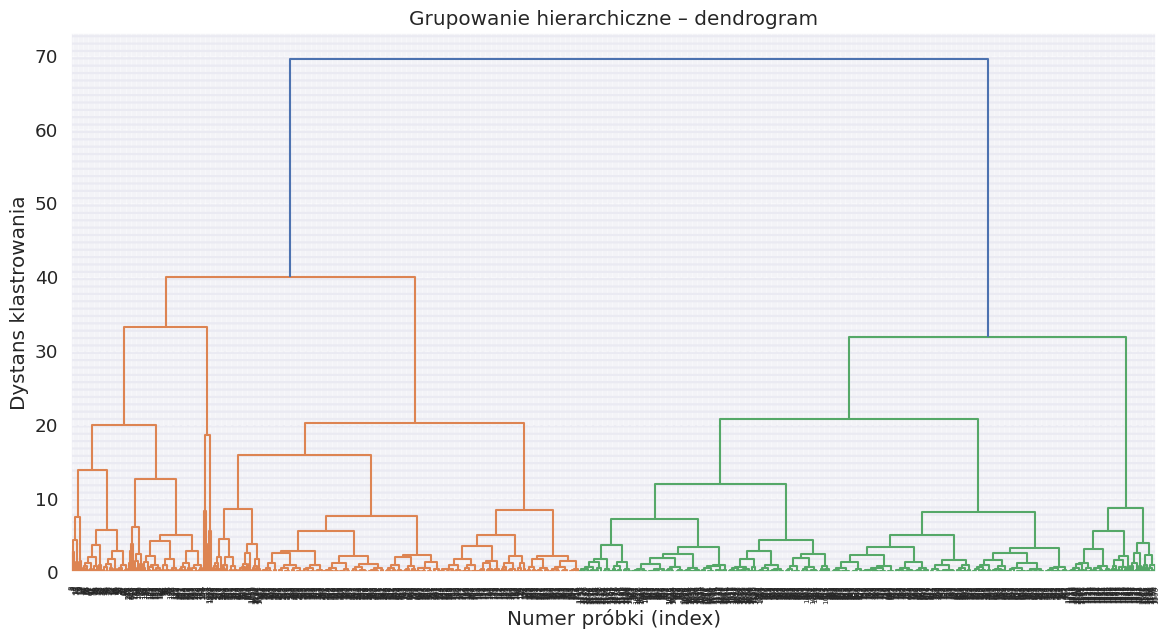

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import pandas as pd

# Wczytanie danych (tak jak masz)
df_soft = pd.read_csv("/content/sample_data/SoftSensor.csv", delimiter=';')
df = df_soft.rename(columns={'Zasadowosc': 'x1', 'Wyd_sodowa': 'x2'})

# Dane do klasteryzacji
X = df[['x1', 'x2']].values

# Grupowanie hierarchiczne metodą Ward (najczęściej używana)
linked = linkage(X, method='ward')

# Wizualizacja
plt.figure(figsize=(14, 7))
dendrogram(
    linked,
    orientation='top',
    labels=df.index,           # numery punktów z wykresu
    distance_sort='descending',
    show_leaf_counts=True
)
plt.title('Grupowanie hierarchiczne – dendrogram')
plt.xlabel("Numer próbki (index)")
plt.ylabel("Dystans klastrowania")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


In [48]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
import plotly.express as px

# --- 1. Wczytanie danych ---
df_soft = pd.read_csv("/content/sample_data/SoftSensor.csv", delimiter=';')
df = df_soft.rename(columns={'Zasadowosc': 'x1', 'Wyd_sodowa': 'x2'})

# --- 2. Dane do klasteryzacji ---
X = df[['x1', 'x2']].values

# --- 3. Grupowanie hierarchiczne ---
linked = linkage(X, method='ward')

# --- 4. Cięcie drzewa na k klastrów ---
k = 8  # ustaw ile chcesz klastrów
labels = fcluster(linked, t=k, criterion='maxclust')

df['cluster'] = labels.astype(str)  # jako str, żeby plotly traktował to jako kategorię

# --- 5. Wizualizacja w plotly ---
fig = px.scatter(
    df, x='x1', y='x2',
    color='cluster',
    width=950, height=500,
    title=f'Grupowanie hierarchiczne (k={k})',
    template='plotly_dark'
)

fig.show()


In [49]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import plotly.express as px

# --- Wczytanie danych ---
df_soft = pd.read_csv("/content/sample_data/SoftSensor.csv", delimiter=';')
df = df_soft.rename(columns={'Zasadowosc': 'x1', 'Wyd_sodowa': 'x2'})

# --- Dane do klasteryzacji ---
X = df[['x1', 'x2']].values

# --- Tworzymy model z odległością euklidesową ---
cluster_euclidean = AgglomerativeClustering(
    n_clusters=8,
    metric='euclidean',    # odległość euklidesowa
    linkage='ward'           # ward + euklides = najpopularniejszy wariant
)

# --- Predykcja klastrów ---
labels = cluster_euclidean.fit_predict(X)

df['cluster'] = labels.astype(str)

# --- Wizualizacja w Plotly ---
fig = px.scatter(
    df, x='x1', y='x2',
    color='cluster',
    width=950, height=500,
    title='Grupowanie hierarchiczne (Ward + odległość euklidesowa)',
    template='plotly_dark'
)

fig.show()

In [50]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import plotly.express as px

# --- Wczytanie danych ---
df_soft = pd.read_csv("/content/sample_data/SoftSensor.csv", delimiter=';')
df = df_soft.rename(columns={'Zasadowosc': 'x1', 'Wyd_sodowa': 'x2'})

# --- Dane do klasteryzacji ---
X = df[['x1', 'x2']].values

# --- Klasteryzacja z metryką Manhattan ---
cluster_manhattan = AgglomerativeClustering(
    n_clusters=8,
    metric='manhattan',    # L1 distance
    linkage='complete'     # complete linkage
)

labels = cluster_manhattan.fit_predict(X)
df['cluster'] = labels.astype(str)

# --- Wizualizacja ---
fig = px.scatter(
    df, x='x1', y='x2',
    color='cluster',
    width=950, height=500,
    title='Klastrowanie hierarchiczne: Manhattan + Complete linkage',
    template='plotly_dark'
)

fig.show()


In [51]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import plotly.express as px

# --- Wczytanie danych ---
df_soft = pd.read_csv("/content/sample_data/SoftSensor.csv", delimiter=';')
df = df_soft.rename(columns={'Zasadowosc': 'x1', 'Wyd_sodowa': 'x2'})

# --- Dane do klasteryzacji ---
X = df[['x1', 'x2']].values

# --- Klasteryzacja z metryką Cosine ---
cluster_cosine = AgglomerativeClustering(
    n_clusters=8,
    metric='cosine',        # odległość kątowa
    linkage='complete'      # Complete linkage
)

labels = cluster_cosine.fit_predict(X)
df['cluster'] = labels.astype(str)

# --- Wizualizacja ---
fig = px.scatter(
    df, x='x1', y='x2',
    color='cluster',
    width=950, height=500,
    title='Klastrowanie hierarchiczne: Cosine + Complete linkage',
    template='plotly_dark'
)

fig.show()
